# 1.Download dataset file. Extract it and store in 'dataset' directory.




In [3]:
! wget https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip
! unzip traffic-signs-data.zip
! mkdir data
! mv *.p data/
! rm traffic-signs-data.zip


Redirecting output to ‘wget-log.3’.
Archive:  traffic-signs-data.zip
  inflating: test.p                  
  inflating: train.p                 
  inflating: valid.p                 


# 2. Load and count pickled data:

In [10]:
import pickle

#File names
training_name = "data/train.p"
validation_name= "data/valid.p"
testing_name = "data/test.p"

#Load from file to variable
with open(testing_name, mode='rb') as f:
    tst = pickle.load(f)
with open(training_name, mode='rb') as f:
    trn = pickle.load(f)
with open(validation_name, mode='rb') as f:
    vld = pickle.load(f)

#Load features to X and labels to Y
X_tst, Y_tst = tst['features'], tst['labels']
X_trn, Y_trn = trn['features'], trn['labels']
X_vld, Y_vld = vld['features'], vld['labels']

# print(X_trn.shape)
# print(Y_trn.shape)


train_number = X_trn.shape[0]
validation_number = X_vld.shape[0]
test_number = X_tst.shape[0]
image_dimension = X_trn.shape[1:]
classes_number = len(set(Y_trn))
print("Training set : ", train_number)
print("Testing set : ", test_number)
print("Validation set : ", validation_number)
print("Image data dimensions : ", image_dimension)
print("Classes : ", classes_number)




Training set :  34799
Testing set :  12630
Validation set :  4410
Image data dimensions :  (32, 32, 3)
Classes :  43


Prepare dict to convert ids to labels

In [0]:
id_label = {0: 'Speed limit (20km/h)', 
              1: 'Speed limit (30km/h)', 
              2: 'Speed limit (50km/h)', 
              3: 'Speed limit (60km/h)', 
              4: 'Speed limit (70km/h)', 
              5: 'Speed limit (80km/h)', 
              6: 'End of speed limit (80km/h)', 
              7: 'Speed limit (100km/h)', 
              8: 'Speed limit (120km/h)', 
              9: 'No passing', 
              10: 'No passing for vehicles over 3.5 metric tons', 
              11: 'Right-of-way at the next intersection', 
              12: 'Priority road', 
              13: 'Yield', 
              14: 'Stop', 
              15: 'No vehicles', 
              16: 'Vehicles over 3.5 metric tons prohibited', 
              17: 'No entry', 
              18: 'General caution', 
              19: 'Dangerous curve to the left', 
              20: 'Dangerous curve to the right',
              21: 'Double curve', 
              22: 'Bumpy road',
              23: 'Slippery road',
              24: 'Road narrows on the right', 
              25: 'Road work', 
              26: 'Traffic signals', 
              27: 'Pedestrians', 
              28: 'Children crossing', 
              29: 'Bicycles crossing', 
              30: 'Beware of ice/snow', 
              31: 'Wild animals crossing', 
              32: 'End of all speed and passing limits', 
              33: 'Turn right ahead', 
              34: 'Turn left ahead', 
              35: 'Ahead only', 
              36: 'Go straight or right', 
              37: 'Go straight or left',
              38: 'Keep right', 
              39: 'Keep left', 
              40: 'Roundabout mandatory', 
              41: 'End of no passing',
              42: 'End of no passing by vehicles over 3.5 metric tons'}

# **3. Explore and visualize data**

Using TensorFlow backend.


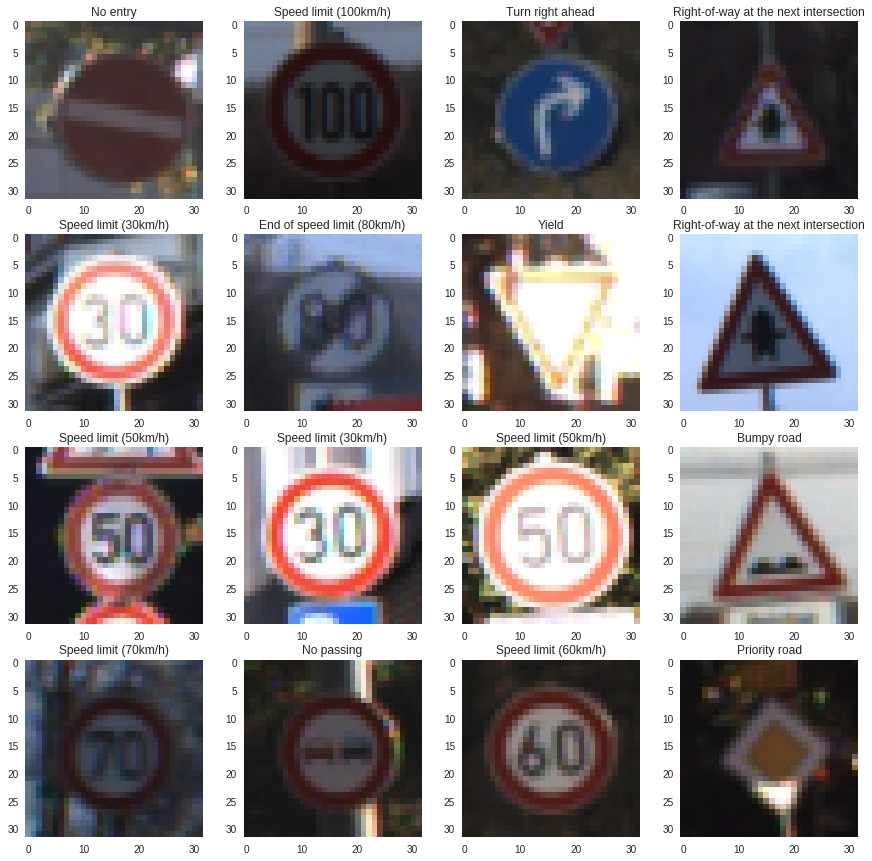

In [19]:
import numpy as np
import random
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

# Configure maplotlib to show visualizations in the notebook.
%matplotlib inline

block = 4
#Get random indexes from train set list
random_index_list = [random.randint(0, X_trn.shape[0]) for _ in range(block * block)]
#Prepare and plot images
fig = plt.figure(figsize=(15, 15))
plt.rcParams["axes.grid"] = False

for i, index in enumerate(random_index_list):
    a=fig.add_subplot(block, block, i+1)
    imgplot = plt.imshow(X_trn[index])
    a.set_title('%s' % id_label[Y_trn[index]])
    
plt.show()



Preprocess data:

In [0]:
X_tst = X_tst / 255
X_trn = X_trn / 255
X_vld = X_vld / 255


In [0]:
#TODO: Comapre with augmentation!

train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()
train_datagen.fit(X_trn)
test_datagen.fit(X_vld)
test_datagen.fit(X_tst)

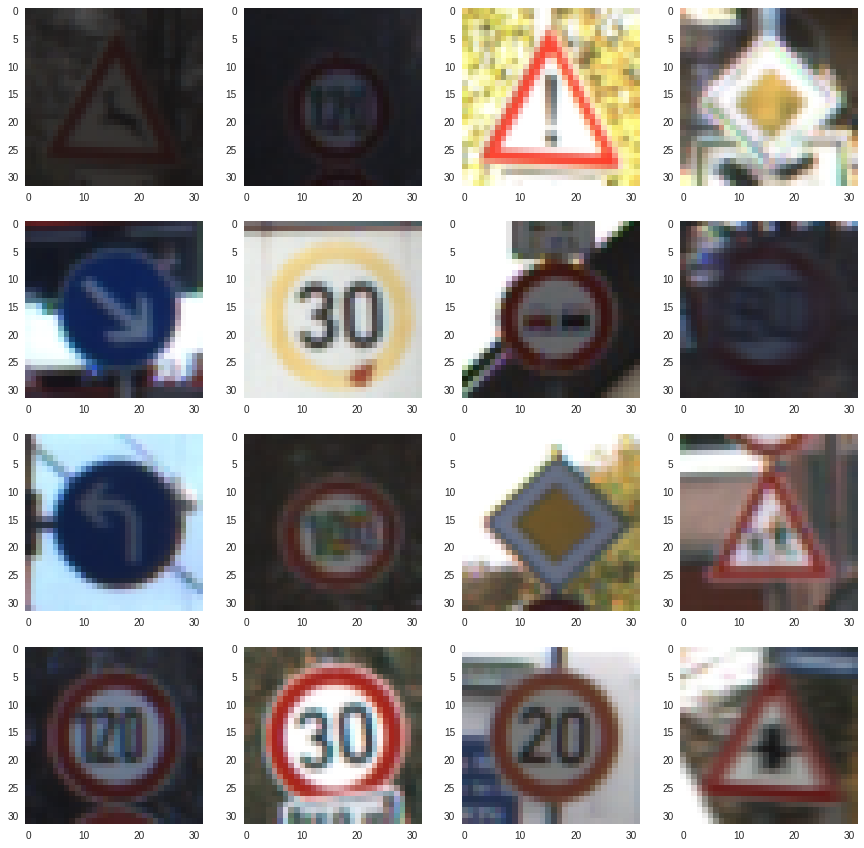

In [29]:
fig = plt.figure(figsize=(15, 15))
i = 0


for x_batch, y_batch in train_datagen.flow(X_trn, Y_trn, batch_size=1):
    a=fig.add_subplot(block, block, i+1)
    imgplot = plt.imshow(x_batch[0])
    i = i + 1
    if i > 15:
        break

    
plt.show()

# 4. Code for capsule network

In [0]:
import numpy as np
import tensorflow as tf
import numpy as np


def conv_caps_layer(input_layer, capsules_size, nb_filters, kernel, stride=2):
    #ADD CODE HERE, AFTER SLIDE about primary caps
    
    return squash(capsules)

def routing(u_hat, b_ij, nb_capsules, nb_capsules_p, iterations=4):
    
    # Start the routing algorithm
    for it in range(iterations):
        with tf.variable_scope('routing_' + str(it)):
            # Line 4 of algo
            

            # Line 5 of algo
            

            # line 6: squash using Eq.1,
            
            
            # line 7:
            
    return tf.squeeze(v_j, axis=1)

def fully_connected_caps_layer(input_layer, capsules_size, nb_capsules, iterations=4):
    
    
    # Get the size of each capsule 
    
    
    # Get the number of capsules below.
    

    # w_ij: 
    

    # Adding one dimension to the input 
    
    # Eq.2
    
    return routing(u_hat, b_ij, nb_capsules, nb_capsules_p, iterations=iterations)

def squash(vector):
    
    return(vec_squashed)
  
import os

In [0]:
# Build the model, AFTER last slide insert code:

# Get graph inputs

# Dropout inputs

# Dynamic batch size

# Translate labels to one hot array

# Create the first convolution and the CapsNet

# Build the images reconstruction

# Build the loss

# Build optimizer

# Log value into tensorboard

In [0]:
# Init model
model = ModelTrafficSign("TrafficSign", output_folder="outputs")
model.init()

In [0]:
# Train your model here.

BATCH_SIZE = 50

def plot_progress(n, cost, acc, label): print(
    "[%s] Batch number = %s, loss = %s, accuracy = %s" % (label, n, cost, acc))

# Training pipeline
n = 0
valid_batch = inference_datagen.flow(X_vld, Y_vld, batch_size=BATCH_SIZE)
best_validation_loss = None
augmented_factor = 0.99
decrease_factor = 0.90
train_batches = train_datagen.flow(X_trn, Y_trn, batch_size=BATCH_SIZE)

while True:
    next_batch = next(train_batches)
    x_batch, y_batch = next_batch
    # Training
    cost, acc = model.optimize(x_batch, y_batch)
    # Validation
    x_batch, y_batch = next(valid_batch, None)
    # Retrieve the cost and accuracy
    cost_val, acc_val = model.evaluate(x_batch, y_batch, tb_test_save=True)

    if n % 10 == 0: # Plot the last results
        plot_progress(b, cost, acc, "Train")
        plot_progress(b, cost_val, acc_val, "Validation")
    if n % 1000 == 0: # Test the model on all the validation
        print("Evaluate full validation dataset ...")
        loss, acc, _ = model.evaluate_dataset(X_vld, Y_vld)
        print("Current loss: %s Best loss: %s" % (loss, best_validation_loss))
        plot_progress(b, loss, acc, "TOTAL Validation")
        if best_validation_loss is None or loss < best_validation_loss:
            best_validation_loss = loss
            model.save()        

    n += 1

In [0]:
### Load the images from WEB and test here
